# Android Malware Detection

This notebook goes through a basic exploratory data analysis of the Android Malware dataset and the Machine Learning Algotithms with Python and the in this project i will be working with the [Android Malware Data Set from Kaggle](https://www.kaggle.com/shashwatwork/android-malware-dataset-for-machine-learning). We'll be trying to predict wheither an Appplication is "Malicious" or "Benign".

Let's begin our understanding of exploratory data analysis of the  [Android Malware Data Set from Kaggle](https://www.kaggle.com/shashwatwork/android-malware-dataset-for-machine-learning). with Python and also implementing some Machine Learning Algorithm in Python for classification and Prediction.

In [1]:
# Basic Import
import time, datetime # to track our Time Complexity
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for Visualizing our data
sns.set_style('whitegrid') # change seaborn style to white grid


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# MACHINE LEARNING ALGORITHMS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


# For Metrics Performance and Result Check
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn import model_selection, tree, preprocessing, metrics, linear_model

# for dumping our model
import pickle

#Import Dependencies
%matplotlib inline

## 1. Get the data and read it in
"Read the Android Malware Dataset in csv form into a dataframe called data"

**The Data set s stored in a folder called data**

In [2]:
data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_236\4137343813.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")


## 2. Data Cleaning

**We going to start the data cleaning process from the target variable "class"**

In [3]:
data['class']

0        S
1        S
2        S
3        S
4        S
        ..
15031    B
15032    B
15033    B
15034    B
15035    B
Name: class, Length: 15036, dtype: object

In [4]:
data['class'].nunique() # Number of unique values of the Target class

2

##### So we can see that the class is obviously in string therefore we going to be converting it to an interger

In [5]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

[0 1] ['B' 'S']
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [6]:
data.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [7]:
print("Total missing values : ",sum(list(data.isna().sum())))

Total missing values :  0


<AxesSubplot:>

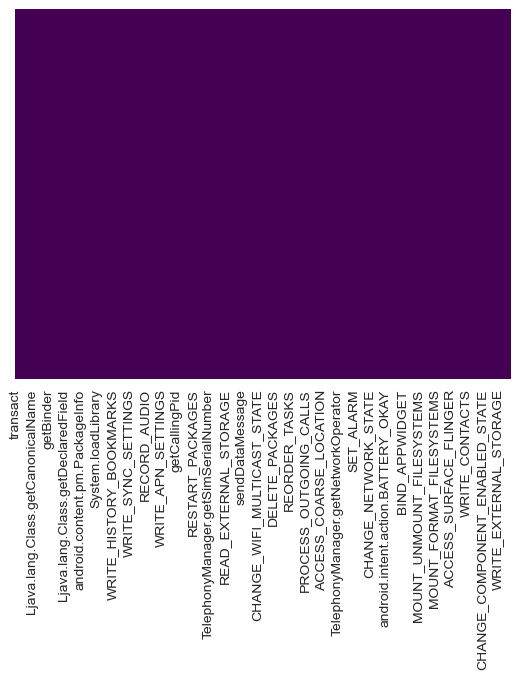

In [8]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## 3. Exploratory Data Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int32(1), int64(215)
memory usage: 24.8 MB


In [10]:
data.shape

(15031, 216)

In [11]:
data.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
count,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,...,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,0.426585,0.446743,0.442818,0.413346,0.445080,0.487060,0.236711,0.330916,0.282483,0.312687,...,0.233384,0.017431,0.004258,0.434569,0.666356,0.290932,0.016034,0.007052,0.044974,0.369570
std,0.494597,0.497172,0.496736,0.492450,0.496991,0.499849,0.425077,0.470559,0.450222,0.463603,...,0.422999,0.130874,0.065115,0.495717,0.471530,0.454207,0.125609,0.083683,0.207253,0.482704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Confirm to make sure all column are of length 15031
counts = True
result = []
dataToCheck = data.columns
startTime = time.time()

def necessaryChecks():
    for i in range(0, 216):
        if data[data.columns[i]].count() ==  15031:
            result.append(True)
        else:
            result.append(False)
    return result

print(necessaryChecks())

checkTime = (time.time() - startTime)
print("Running Time: %s" % datetime.timedelta(seconds=checkTime))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [13]:
data.corr()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
transact,1.000000,0.810763,0.816395,0.963355,0.813133,0.881907,-0.274939,0.656701,0.587034,0.613710,...,0.068227,-0.003870,-0.021282,0.209914,0.244012,0.121293,-0.008361,-0.005173,-0.000890,-0.570093
onServiceConnected,0.810763,1.000000,0.983194,0.783564,0.984792,0.842648,-0.324744,0.644692,0.596599,0.593575,...,0.059422,-0.002093,-0.023823,0.192987,0.256965,0.126512,-0.018821,-0.002167,0.007749,-0.561036
bindService,0.816395,0.983194,1.000000,0.791157,0.994620,0.848676,-0.321889,0.649393,0.599701,0.595670,...,0.062251,0.001005,-0.023327,0.196842,0.258132,0.128147,-0.017828,-0.001503,0.008178,-0.558808
attachInterface,0.963355,0.783564,0.791157,1.000000,0.787746,0.861405,-0.264026,0.642582,0.580355,0.608874,...,0.065792,-0.001339,-0.021691,0.213686,0.232069,0.119708,-0.011419,-0.002930,0.004940,-0.551434
ServiceConnection,0.813133,0.984792,0.994620,0.787746,1.000000,0.848090,-0.322683,0.646712,0.599214,0.594027,...,0.063505,-0.001648,-0.023613,0.195722,0.256962,0.131944,-0.018400,-0.001885,0.006541,-0.557568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCESS_FINE_LOCATION,0.121293,0.126512,0.128147,0.119708,0.131944,0.102301,-0.008317,0.199199,0.196093,0.203678,...,0.195107,0.018777,0.018852,0.215900,0.248221,1.000000,0.025522,0.040543,0.053949,0.017259
SET_WALLPAPER_HINTS,-0.008361,-0.018821,-0.017828,-0.011419,-0.018400,-0.021598,0.016140,0.010411,0.042262,-0.008406,...,0.142446,-0.000813,0.016057,0.009904,0.047639,0.025522,1.000000,0.058869,-0.020034,-0.015435
SET_PREFERRED_APPLICATIONS,-0.005173,-0.002167,-0.001503,-0.002930,-0.001885,-0.015315,-0.011393,-0.035612,-0.001666,-0.025973,...,0.041842,0.013076,0.006699,0.039994,0.003990,0.040543,0.058869,1.000000,0.085290,0.011243
WRITE_SECURE_SETTINGS,-0.000890,0.007749,0.008178,0.004940,0.006541,0.000480,0.107983,-0.055055,-0.070561,-0.042501,...,0.205087,0.186955,0.163293,0.095347,0.037815,0.053949,-0.020034,0.085290,1.000000,-0.005872


            Target Variable Distribution           


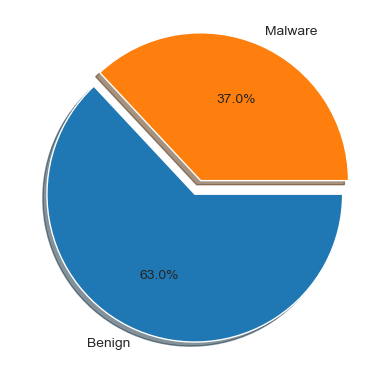

In [14]:
#Let us first analyze the distribution of the target variable

MAP={}
labels = ["Malware", "Benign"]
for e, i in enumerate(data["class"].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = data.copy()
df1["class"]=df1["class"].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1["class"].value_counts(), labels=df1["class"].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

## 4. Feature Selection

#### We would be making use of the pearson correlation to extact our feature

In [15]:
dataTargetFeature = data.corr()['class'][:-1]

In [16]:
dataTargetFeature

transact                     -0.570093
onServiceConnected           -0.561036
bindService                  -0.558808
attachInterface              -0.551434
ServiceConnection            -0.557568
                                ...   
WRITE_EXTERNAL_STORAGE        0.007422
ACCESS_FINE_LOCATION          0.017259
SET_WALLPAPER_HINTS          -0.015435
SET_PREFERRED_APPLICATIONS    0.011243
WRITE_SECURE_SETTINGS        -0.005872
Name: class, Length: 215, dtype: float64

Number of Features having correlation >0.5 with target variable

In [17]:
data_feature_selection_corr = dataTargetFeature[abs(dataTargetFeature) > 0.2].sort_values(ascending=False)
data_feature_selection_corr

SEND_SMS                                       0.546075
android.telephony.SmsManager                   0.435190
READ_PHONE_STATE                               0.409344
RECEIVE_SMS                                    0.388328
READ_SMS                                       0.370336
android.intent.action.BOOT_COMPLETED           0.314303
TelephonyManager.getLine1Number                0.305944
WRITE_SMS                                      0.267501
WRITE_HISTORY_BOOKMARKS                        0.242250
TelephonyManager.getSubscriberId               0.241551
android.telephony.gsm.SmsManager               0.241038
INSTALL_PACKAGES                               0.235660
READ_HISTORY_BOOKMARKS                         0.231044
INTERNET                                       0.204219
AUTHENTICATE_ACCOUNTS                         -0.200315
android.os.IBinder                            -0.200390
IBinder                                       -0.200537
Binder                                        -0

In [18]:
data_feature_selection_corr.index

Index(['SEND_SMS', 'android.telephony.SmsManager', 'READ_PHONE_STATE',
       'RECEIVE_SMS', 'READ_SMS', 'android.intent.action.BOOT_COMPLETED',
       'TelephonyManager.getLine1Number', 'WRITE_SMS',
       'WRITE_HISTORY_BOOKMARKS', 'TelephonyManager.getSubscriberId',
       'android.telephony.gsm.SmsManager', 'INSTALL_PACKAGES',
       'READ_HISTORY_BOOKMARKS', 'INTERNET', 'AUTHENTICATE_ACCOUNTS',
       'android.os.IBinder', 'IBinder', 'Binder', 'CAMERA',
       'READ_SYNC_SETTINGS', 'Ljava.lang.Class.forName', 'Runtime.getRuntime',
       'Ljava.lang.Object.getClass', 'mount', 'android.intent.action.SEND',
       'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'Ljavax.crypto.Cipher',
       'System.loadLibrary', 'DexClassLoader', 'getCallingUid', 'SecretKey',
       'Ljava.lang.Class.getMethod', 'HttpGet.init', 'KeySpec',
       'android.content.pm.PackageInfo', 'Ljavax.crypto.spec.SecretKeySpec',
       'getBinder', 'GET_ACCOUNTS', 'Ljava.lang.Class.getDeclaredField',
       'Landroid.conte

In [19]:
data_feature_selection = data[data_feature_selection_corr.index]

In [20]:
data_feature_selection=data_feature_selection.join(data['class'])

In [21]:
data_feature_selection.head()

,SEND_SMS,android.telephony.SmsManager,READ_PHONE_STATE,RECEIVE_SMS,READ_SMS,android.intent.action.BOOT_COMPLETED,TelephonyManager.getLine1Number,WRITE_SMS,WRITE_HISTORY_BOOKMARKS,TelephonyManager.getSubscriberId,...,Ljava.lang.Class.cast,Ljava.net.URLDecoder,Ljava.lang.Class.getCanonicalName,attachInterface,android.os.Binder,ServiceConnection,bindService,onServiceConnected,transact,class
0,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,1,1,1,0,1,...,1,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [22]:
# Extract selected data to csv format

data_feature_selection.to_csv("Feature.csv", index=False)

In [23]:
data_feature_selection.corr()

,SEND_SMS,android.telephony.SmsManager,READ_PHONE_STATE,RECEIVE_SMS,READ_SMS,android.intent.action.BOOT_COMPLETED,TelephonyManager.getLine1Number,WRITE_SMS,WRITE_HISTORY_BOOKMARKS,TelephonyManager.getSubscriberId,...,Ljava.lang.Class.cast,Ljava.net.URLDecoder,Ljava.lang.Class.getCanonicalName,attachInterface,android.os.Binder,ServiceConnection,bindService,onServiceConnected,transact,class
SEND_SMS,1.000000,0.754027,0.309440,0.718977,0.511724,0.221987,0.158512,0.392735,0.015983,0.146379,...,-0.245969,-0.261750,-0.203369,-0.264026,-0.304983,-0.322683,-0.321889,-0.324744,-0.274939,0.546075
android.telephony.SmsManager,0.754027,1.000000,0.262180,0.504644,0.322347,0.154834,0.223218,0.226769,0.018976,0.103521,...,-0.169478,-0.156119,-0.130134,-0.195830,-0.230374,-0.241031,-0.240018,-0.244261,-0.206015,0.435190
READ_PHONE_STATE,0.309440,0.262180,1.000000,0.319385,0.277088,0.369787,0.402570,0.230065,0.174230,0.334256,...,-0.065294,-0.018590,-0.064135,-0.069642,-0.075223,-0.057555,-0.059110,-0.058871,-0.081029,0.409344
RECEIVE_SMS,0.718977,0.504644,0.319385,1.000000,0.570736,0.284841,0.175246,0.424318,0.014294,0.173592,...,-0.161470,-0.197425,-0.112071,-0.164913,-0.202542,-0.216703,-0.216002,-0.219259,-0.176010,0.388328
READ_SMS,0.511724,0.322347,0.277088,0.570736,1.000000,0.325806,0.098884,0.730997,0.046811,0.224964,...,-0.139188,-0.148124,-0.139012,-0.158643,-0.197954,-0.214590,-0.214923,-0.221952,-0.170785,0.370336
android.intent.action.BOOT_COMPLETED,0.221987,0.154834,0.369787,0.284841,0.325806,1.000000,0.225976,0.248328,0.211779,0.218275,...,-0.075467,-0.058734,-0.069548,-0.074508,-0.064252,-0.065566,-0.068488,-0.069102,-0.078892,0.314303
TelephonyManager.getLine1Number,0.158512,0.223218,0.402570,0.175246,0.098884,0.225976,1.000000,0.128967,0.191736,0.312952,...,-0.050444,0.010230,-0.055888,-0.089406,-0.065449,-0.053307,-0.052272,-0.056138,-0.097528,0.305944
WRITE_SMS,0.392735,0.226769,0.230065,0.424318,0.730997,0.248328,0.128967,1.000000,0.048865,0.297530,...,-0.094741,-0.087804,-0.083090,-0.082506,-0.120123,-0.145549,-0.144419,-0.149226,-0.095959,0.267501
WRITE_HISTORY_BOOKMARKS,0.015983,0.018976,0.174230,0.014294,0.046811,0.211779,0.191736,0.048865,1.000000,0.063243,...,-0.104606,-0.013801,-0.094559,-0.105518,-0.132979,-0.121818,-0.121534,-0.122755,-0.113418,0.242250
TelephonyManager.getSubscriberId,0.146379,0.103521,0.334256,0.173592,0.224964,0.218275,0.312952,0.297530,0.063243,1.000000,...,-0.053902,0.032130,-0.065460,-0.054108,-0.024849,-0.008490,-0.007416,-0.007306,-0.062314,0.241551


<AxesSubplot:>

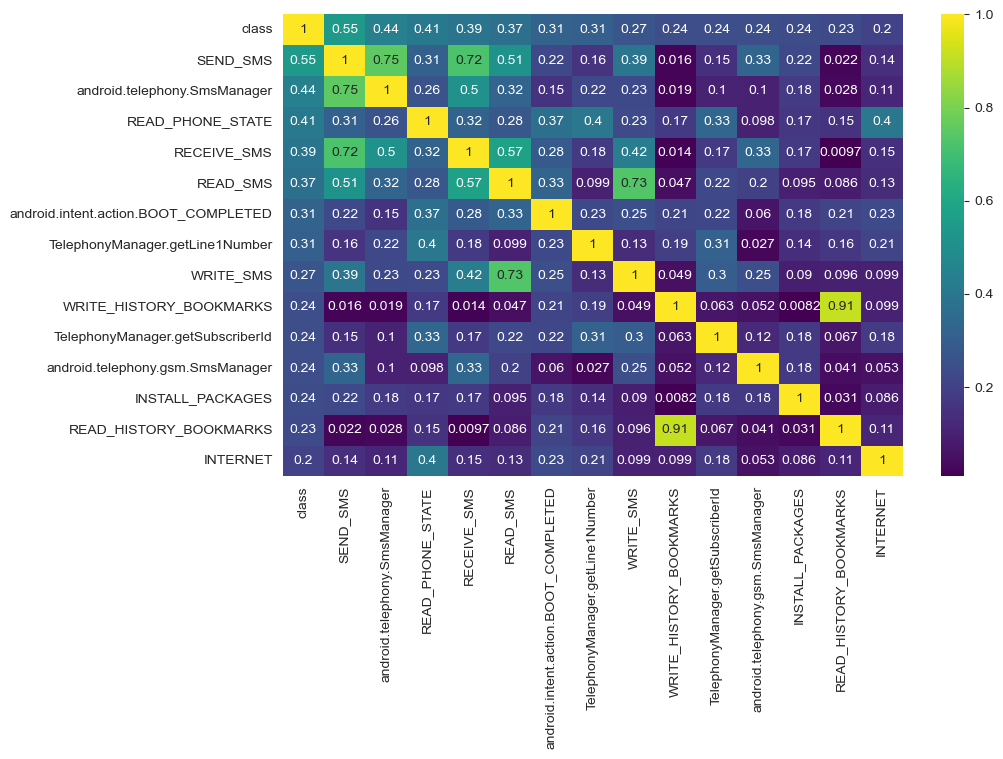

In [24]:
k = 15 #number of variables for heatmap
cols = data_feature_selection.corr().nlargest(k, 'class')['class'].index
cm = data_feature_selection[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [25]:
data_feature_selection.shape

(15031, 56)

# 6. Predictive Modeling


## Train Test Split

**So its time to split the dataset into training set and testing test**

In [26]:
X = data_feature_selection.drop('class',axis=1)
y = data_feature_selection['class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True)

In [28]:
print("Train features size : ",len(X_train))
print("Train labels size : ",len(y_train))
print("Test features size : ",len(X_test))
print("Test features size : ",len(y_test))

Train features size :  12024
Train labels size :  12024
Test features size :  3007
Test features size :  3007


**Let's Extract the column we going to be using for our tests Data during Deployment**

In [29]:
malware = data[data['class'] == 1]
benign = data[data['class'] == 0]

In [30]:
malware.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [31]:
benign.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
5560,1,1,1,1,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
5561,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,0,0,0,0
5562,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
malwareFirst = malware.iloc[0:1]
benignFirst = benign.iloc[0:1]

In [33]:
malwareFirst

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
benignFirst

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
5560,1,1,1,1,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [35]:
malwareFirst.to_csv("testSet1.csv", index=False)
benignFirst.to_csv('testSet2.csv', index=False)

In [36]:
# function to print out our classification

def Classification_Summary(pred, i, elapsed_time):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(y_test, pred),4)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(y_test, pred),4)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(y_test, pred),4)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(y_test, pred),4)*100 #
    Evaluation_Results.iloc[i]['Time(sec)']= round(elapsed_time, 2)
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),4)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred),4)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues", fmt="d")

In [37]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall', 'F1-score', 'Time(sec)'])
Evaluation_Results.index=['Support Vector Machine (SVM)','K Nearest Neighbours (KNN)','Random Forest Classifier (RF)',
                          "Stacking Classifier"]
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,Time(sec)
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Stacking Classifier,0.0,0.0,0.0,0.0,0.0


## A. SUPPORT VECTOR MACHINE (SVM)

In [38]:
st = time.time()
# # Building Support Vector Machine Classifier

SVM_Model = SVC()
SVM_Model.fit(X_train,y_train)
SVM_Pred = SVM_Model.predict(X_test)

et = time.time()

svm_time = et - st

print("Running Time: %s" % datetime.timedelta(seconds=svm_time))

Running Time: 0:00:07.293217


<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 96.41%
F1 Score = 95.1%

 Confusiton Matrix:
 [[1850   27]
 [  81 1049]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1877
           1       0.97      0.93      0.95      1130

    accuracy                           0.96      3007
   macro avg       0.97      0.96      0.96      3007
weighted avg       0.96      0.96      0.96      3007



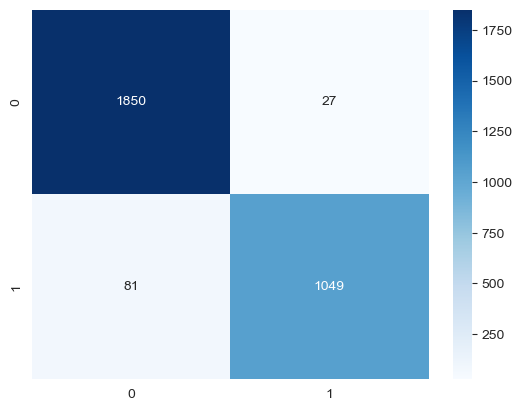

In [39]:
Classification_Summary(SVM_Pred,0, svm_time)

## B. K Nearest Neighbour (KNN)

In [40]:
# k-Nearest Neighbours

start_time = time.time()

KNN_Model = KNeighborsClassifier(n_neighbors=40)
fitKnn = KNN_Model.fit(X_train,y_train)
KNN_Pred = KNN_Model.predict(X_test)
knn_time = (time.time() - start_time)

print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Running Time: 0:00:03.442837


<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 94.88%
F1 Score = 93.01%

 Confusiton Matrix:
 [[1828   49]
 [ 105 1025]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1877
           1       0.95      0.91      0.93      1130

    accuracy                           0.95      3007
   macro avg       0.95      0.94      0.94      3007
weighted avg       0.95      0.95      0.95      3007



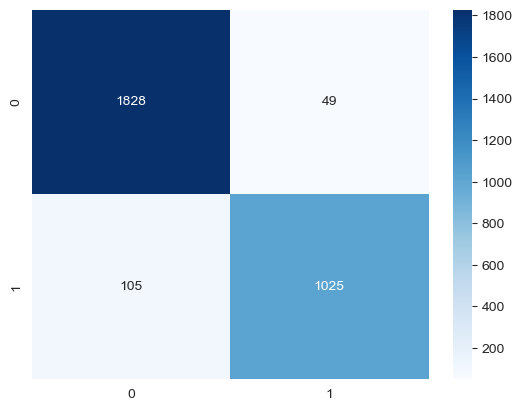

In [41]:
Classification_Summary(KNN_Pred,1, knn_time)

## C. RANDOM FOREST CLASSIFIER (RF)

In [42]:
# Random Forest Classifier
start_time = time.time()

RF_Model = RandomForestClassifier(n_estimators=1)
RF_Model.fit(X_train, y_train)
RF_Pred = RF_Model.predict(X_test)
rf_time = (time.time() - start_time)

print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Running Time: 0:00:00.087950


<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 96.31%
F1 Score = 95.02000000000001%

 Confusiton Matrix:
 [[1837   40]
 [  71 1059]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1877
           1       0.96      0.94      0.95      1130

    accuracy                           0.96      3007
   macro avg       0.96      0.96      0.96      3007
weighted avg       0.96      0.96      0.96      3007



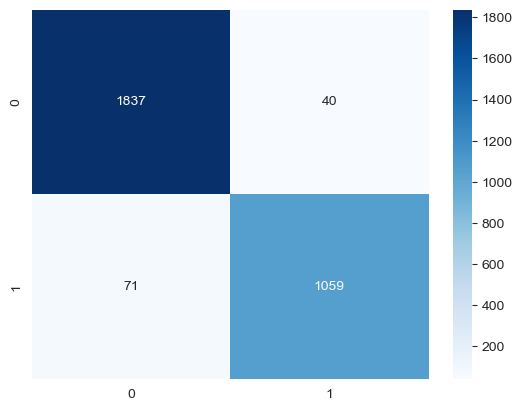

In [43]:
Classification_Summary(RF_Pred,2, rf_time)

In [48]:
 Evaluation_Results

,Accuracy,Precision,Recall,F1-score,Time(sec)
Support Vector Machine (SVM),96.41,97.49,92.83,95.10,7.29
K Nearest Neighbours (KNN),94.88,95.44,90.71,93.01,3.44
Random Forest Classifier (RF),96.31,96.36,93.72,95.02,0.09
Stacking Classifier,0.00,0.00,0.00,0.00,0.00


# Gridsearch

Finding the right parameters (like what C or gamma values to use): This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [45]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [46]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [47]:
# May take awhile!
svcgrid = grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.862 total time=  32.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.858 total time=  23.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=  23.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.848 total time=  31.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=  20.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   4.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   5.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.959 total time=   8.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.954 total time=   4.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   5.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.937 total time=   8.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.958 total time=  19.9s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.958 total time=  19.9s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.953 total time=  16.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.962 total time=  16.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.973 total time=   4.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.981 total time=   3.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.975 total time=   3.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.972 total time=   4.8s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.979 total time=   3.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.971 total time=   5.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.973 total time=   7.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.977 total time=   6.4s
[CV 4/5] END ....C=1000, gam

In [48]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [49]:
start_time = time.time()
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
knn_time = (time.time() - start_time)

print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Running Time: 0:00:39.899081


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0, 0.5, 'Error Rate')

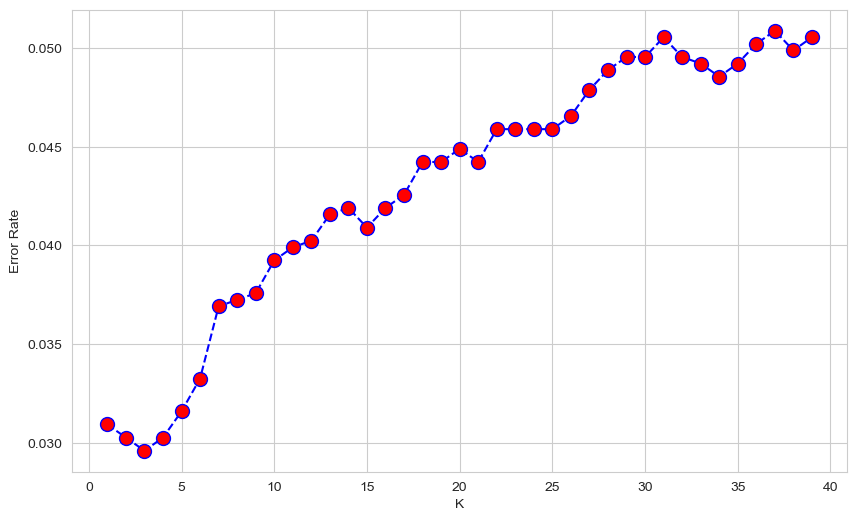

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title = ('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Stacking the bagging classifiers 

In [51]:
# Define estimators
start_time = time.time()

estimator_list = [
    ('svm_rbf', SVC(gamma=0.1, C=10)),
    ('knn', KNeighborsClassifier(n_neighbors=4)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list,final_estimator=RandomForestClassifier(n_estimators=100)
)

# Train stacked model  
stack_model.fit(X_train, y_train)
stack_time = (time.time() - start_time)
print("Running Time: %s" % datetime.timedelta(seconds=stack_time))

Running Time: 0:00:21.148560


In [52]:
stack_pred = stack_model.predict(X_test)

<<<----------------------------------- Evaluating Stacking Classifier ----------------------------------->>>

Accuracy = 97.57000000000001%
F1 Score = 96.73%

 Confusiton Matrix:
 [[1855   22]
 [  51 1079]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1877
           1       0.98      0.95      0.97      1130

    accuracy                           0.98      3007
   macro avg       0.98      0.97      0.97      3007
weighted avg       0.98      0.98      0.98      3007



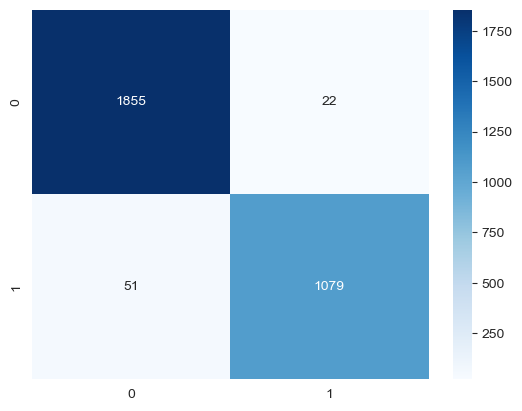

In [53]:
Classification_Summary(stack_pred,3, stack_time)

## Model Results
Which model had the best accuracy?

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

## Regular accuracy scores

In [54]:
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,Time(sec)
Support Vector Machine (SVM),96.41,97.49,92.83,95.10,3.17
K Nearest Neighbours (KNN),94.88,95.44,90.71,93.01,1.07
Random Forest Classifier (RF),95.21,93.55,93.72,93.63,0.02
Stacking Classifier,97.57,98.00,95.49,96.73,21.15


In [55]:
Evaluation_Results.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1-score,Time(sec)
Stacking Classifier,97.57,98.00,95.49,96.73,21.15
Support Vector Machine (SVM),96.41,97.49,92.83,95.10,3.17
Random Forest Classifier (RF),95.21,93.55,93.72,93.63,0.02
K Nearest Neighbours (KNN),94.88,95.44,90.71,93.01,1.07


                                                   ML Algorithms Comparison                                                   


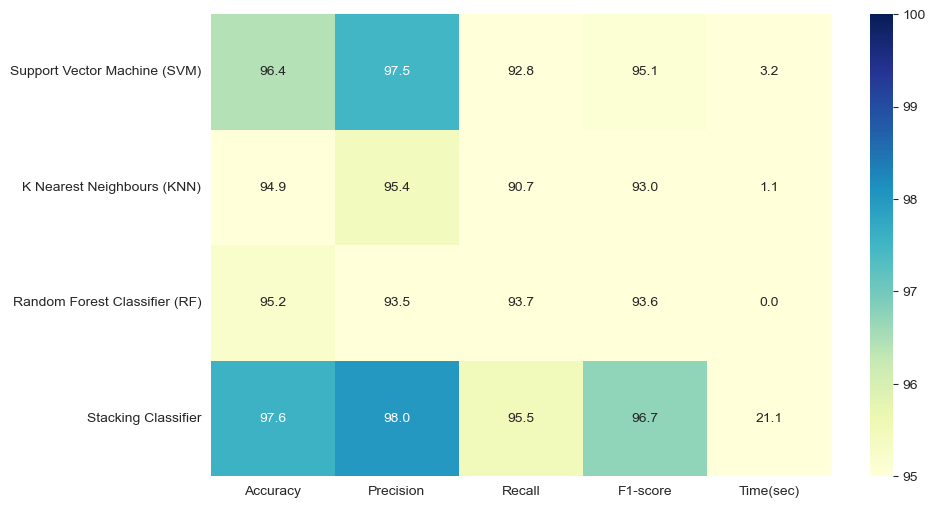

In [56]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(130))
plt.figure(figsize=[10,6])
sns.heatmap(Evaluation_Results, annot=True, vmin=95, vmax=100, cmap='YlGnBu', fmt='.1f')
plt.show()

In [57]:
pickle.dump(stack_model, open("stacking.pki", "wb"))

Done!